# Section 6: LDA, QDA and Naive Bayes


## 1
In this section, we plan to use LDA, QDA as well as Naive Bayes methods to predict heart failure death caused by CVDs (cardiovascular diseases). Our models will use five predictive features: age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine and serum sodium. The target will have labels 1 and 0 for death and no death.
- More details on the dataset:
[Heart Failure](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv)

In [2]:
# Load dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

heart_data=pd.read_csv('sec06.csv')
heart_data.head(5)
index=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

X_data=heart_data[index]
print(X_data)
y_data=heart_data.iloc[:,-1].values.ravel()

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

## 1.1

- Scale your data and split the data into a training and test dataset with 30% test size and random_state=0. 
- Next, fit LDA and QDA models to the training datasetand compare the models' performance on the test dataset using confusion matrices as well as prediction accuracy scores. 
- Finally, explain why your prediction accuracy scores are high or low. 

See more on confusion matrices here: [Confusion Matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix). See more on LDA/QDA here: [LDA/QDA](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda).

Prediction accuracy, LDA:0.7666666666666667
Prediction accuracy, QDA:0.7


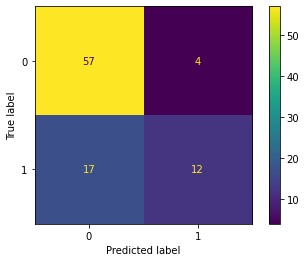

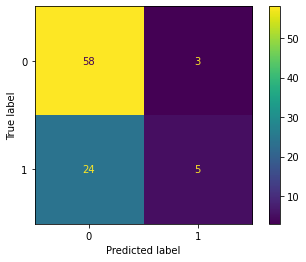

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import plot_confusion_matrix

scaler=StandardScaler()
normalized_x=scaler.fit_transform(X_data.values)

X_train,X_test,y_train,y_test=train_test_split(normalized_x,y_data,test_size=0.3,random_state=0,stratify=y_data)

LDA_model=LDA()
QDA_model=QDA()
accuracy_LDA=LDA_model.fit(X_train,y_train).score(X_test,y_test)
accuracy_QDA=QDA_model.fit(X_train,y_train).score(X_test,y_test)
plot_confusion_matrix(LDA_model,X_test,y_test)
print(f'Prediction accuracy, LDA:{accuracy_LDA}')
plot_confusion_matrix(QDA_model,X_test,y_test)
print(f'Prediction accuracy, QDA:{accuracy_QDA}')

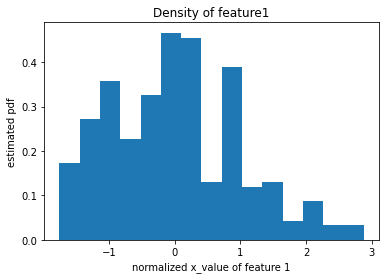

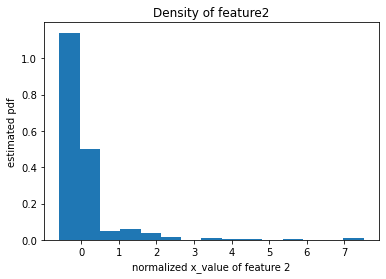

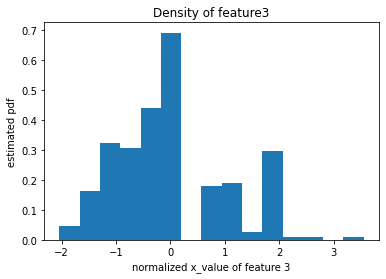

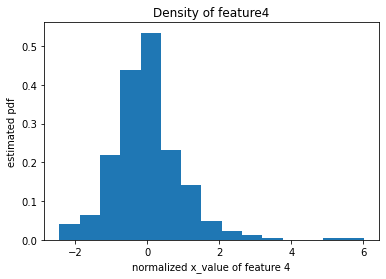

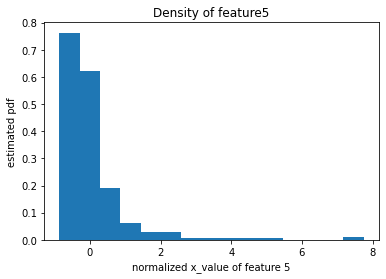

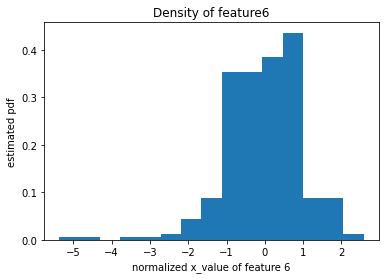

the covariance matrix within category 1:
[[ 1.1143857  -0.21030292  0.16096691  0.13146322  0.13142546  0.14372187]
 [-0.21030292  2.30969863 -0.00809229  0.18633131 -0.32437271  0.09642118]
 [ 0.16096691 -0.00809229  1.19698198  0.00909267  0.29932188  0.22177391]
 [ 0.13146322  0.18633131  0.00909267  1.23567893 -0.10816908  0.20830666]
 [ 0.13142546 -0.32437271  0.29932188 -0.10816908  2.33270203 -0.28147377]
 [ 0.14372187  0.09642118  0.22177391  0.20830666 -0.28147377  1.29453832]]
the covariance matrix within category 0:
[[ 0.83879545 -0.02351468  0.09979469 -0.11946807  0.08577129  0.00359186]
 [-0.02351468  0.77229866 -0.07623661 -0.00270854 -0.01761647  0.01292644]
 [ 0.09979469 -0.07623661  0.80712132  0.13564366 -0.03828295  0.17357737]
 [-0.11946807 -0.00270854  0.13564366  0.94340422 -0.02619145 -0.01020969]
 [ 0.08577129 -0.01761647 -0.03828295 -0.02619145  0.44817831 -0.19053769]
 [ 0.00359186  0.01292644  0.17357737 -0.01020969 -0.19053769  0.84764974]]


In [4]:
for j in range(normalized_x.shape[1]):
    plt.hist(normalized_x[:,j],bins=15,density=True)
    plt.xlabel(f'normalized x_value of feature {j+1}')
    plt.ylabel(f'estimated pdf')
    plt.title(f'Density of feature{j+1}')
    plt.show()

X_kind1=X_train[y_train==1]
X_kind0=X_train[y_train==0]
covA=np.cov(X_kind1.T)
covB=np.cov(X_kind0.T)
print(f'the covariance matrix within category 1:\n{covA}')
print(f'the covariance matrix within category 0:\n{covB}')
# Features 1,2,3,5 do not follow a Gaussian distribution.
# Therefore an assumption for LDA and QDA does not hold.
# The covariances matrices within categories differ.
# Therefore an assumption for LDA does not hold.

## 1.2

- Re-train the LDA and QDA models based on the two features 'age' and 'ejection_fraction'
- Plot the decision boundaries of both models with MAP thresholds 0.5.
- Make a scatterplot of the test dataset and highlight those points whose prediction results are different between the LDA and QDA models.

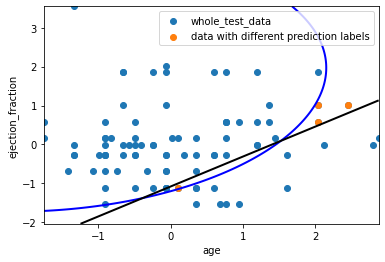

In [16]:
index=[0,2]
X_new=normalized_x[:,index]

X_train,X_test,y_train,y_test=train_test_split(X_new,y_data,test_size=0.3,random_state=0,stratify=y_data)
LDA_model=LDA()
QDA_model=QDA()
LDA_model.fit(X_train,y_train)
QDA_model.fit(X_train,y_train)

xmin,xmax=np.min(X_new[:,0]),np.max(X_new[:,0])
ymin,ymax=np.min(X_new[:,1]),np.max(X_new[:,1])
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))

T_QDA = QDA_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
T_QDA = T_QDA[:, 1].reshape(xx.shape)

T_LDA = LDA_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
T_LDA = T_LDA[:,1].reshape(xx.shape)

plt.contour(xx, yy, T_QDA, [0.50], linewidths=2, colors='blue') # Draw the boundary where P = 0.50
plt.contour(xx, yy, T_LDA, [0.50], linewidths=2, colors ='black') # Draw the boundary where P = 0.50
plt.scatter(X_test[:,0],X_test[:,1],label='whole_test_data')

diff_index=(LDA_model.predict(X_test)!=QDA_model.predict(X_test))
X_diff=X_test[diff_index,:]
plt.scatter(X_diff[:,0],X_diff[:,1],label='data with different prediction labels')
plt.xlabel('age')
plt.ylabel('ejection_fraction')
plt.legend()
plt.show()

## 2.1
- Normalize the data and split it into training and test sets with test_size=0.4 and random_state=636.
- Manually fit a Naive Bayes model using two features: serum_creatinine and serum_sodium. Use a flat prior.
- Print the model accuracy.

In [5]:
import scipy.stats as st
### the following are the datas you use
index=[4,5]
X_new=normalized_x[:,index]
y_data=heart_data.iloc[:,-1].values.ravel()

X_train,X_test,y_train,y_test=train_test_split(X_new,y_data,test_size=0.4,random_state=636,stratify=y_data)
## calculate parameter in two catagories
X_train_1=X_train[y_train==1]
X_train_0=X_train[y_train==0]

mean_1=np.mean(X_train_1,axis=0)
mean_0=np.mean(X_train_0,axis=0)
std_1=np.std(X_train_1,axis=0)
std_0=np.std(X_train_0,axis=0)

prior_1=X_train_1.shape[0]/X_train.shape[0]
prior_0=X_train_0.shape[0]/X_train.shape[0]

##x_test is array with shape(2,)
def predict_data(x_test,mean_1,std_1,mean_0,std_0,prior_1,prior_0):
    value_1=st.norm.pdf(x_test[0],loc=mean_1[0],scale=std_1[0])
    value_2=st.norm.pdf(x_test[1],loc=mean_1[1],scale=std_1[1])
    
    value_3=st.norm.pdf(x_test[0],loc=mean_0[0],scale=std_0[0])
    value_4=st.norm.pdf(x_test[1],loc=mean_0[1],scale=std_0[1])
    
    post_1=value_1*value_2*prior_1
    post_0=value_3*value_4*prior_0
    if post_1>=post_0:
        return 1
    else:
        return 0

y_predict=[]
for i in range(X_test.shape[0]):
    y_predict.append(predict_data(X_test[i,:],mean_1,std_1,mean_0,std_0,prior_1,prior_0))
    
accuracy=sum(y_predict==y_test)/len(y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7166666666666667


## 2.2
Plot the covariance matrix of all features and explain whether a Naive Bayes model built on all features would not perform well.

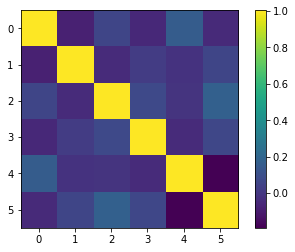

(6, 299)


In [21]:
A=np.cov(normalized_x.T)
plt.imshow(A)
plt.colorbar()
plt.show()
print(normalized_x.T.shape)
# A Naive Bayes model built on all features would not perform well.
# Features 4 and 5 are not independent.
# And based on the previous histograms, they are not Gaussian.